In [2]:
#!pip install snscrape

In [3]:
all_accounts=['Tennis',"ITFTennis","TennisChannel","Wimbledon","@usta","TennisAustralia","TennisTV","DavisCup","FedCup","rolandgarros","usopen","AustralianOpen"]

In [4]:
# Scraping all possible tweets
import snscrape.modules.twitter as sntwitter
import csv
unique_accounts=set(all_accounts) 
accounts = sorted(unique_accounts) #Sort & convert datatype to list

with open('all_tweets.csv', 'w', newline='') as file:
  for username in accounts:
    writer = csv.writer(file)
    for i, tweet in enumerate(sntwitter.TwitterSearchScraper('from:' +username+ ' since:2020-01-01 until:2023-03-30 lang:"en" ').get_items()):
        writer.writerow([tweet.username, tweet.content.encode("utf-8"), 
                         tweet.date, tweet.user.location,tweet.likeCount, 
                         tweet.retweetCount, tweet.user.followersCount, tweet.url])

C:\Users\Vojimir Ranitovic\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
C:\Users\Vojimir Ranitovic\AppData\Local\Temp\ipykernel_1020\2220179781.py:11: FutureWarning: username is deprecated, use user.username instead
  writer.writerow([tweet.username, tweet.content.encode("utf-8"),
C:\Users\Vojimir Ranitovic\AppData\Local\Temp\ipykernel_1020\2220179781.py:11: FutureWarning: content is deprecated, use rawContent instead
  writer.writerow([tweet.username, tweet.content.encode("utf-8"),
Tweet 1403320427343122438 contains an app icon medium key '4_1645693950345478145' on app 'iphone_app'/'1371584793', but the corresponding medium is missing; dropping
Tweet 1403320427343122438 contains an app icon medium key '4_1645693950345478145' o

In [ ]:
### Only about N. Dj.

In [8]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

# Define the search terms
search_terms = ['Novak', 'Djokovic', 'Novak Djokovic',"novak","djokovic"]

# Define the date range for the search
start_date = '2019-01-01'
end_date = '2023-03-30'

# Define the Twitter accounts to search for
accounts = ['Tennis', 'ITFTennis', 'TennisChannel', 'Wimbledon', '@usta', 'TennisAustralia', 'TennisTV', 'DavisCup', 'FedCup', 'rolandgarros', 'usopen', 'AustralianOpen']

# Create an empty list to store the tweets and replies
tweets_list = []

# Loop through the search terms and scrape tweets
for term in search_terms:
    # Loop through the Twitter accounts
    for account in accounts:
        # Define the search query
        query = f'{term} from:{account} since:{start_date} until:{end_date}'

        # Use SNScrape to execute the search query
        for tweet in sntwitter.TwitterSearchScraper(query).get_items():
            # Store the tweet text, date, and author in a dictionary
            tweet_dict = {'text': tweet.content, 'date': tweet.date, 'author': tweet.user.username}

            # If the tweet is a reply, store the parent tweet ID
            if tweet.inReplyToTweetId is not None:
                tweet_dict['parent_tweet_id'] = tweet.inReplyToTweetId

            # Append the dictionary to the list
            tweets_list.append(tweet_dict)

# Convert the list of dictionaries to a Pandas DataFrame
tweets_df = pd.DataFrame(tweets_list)

# Save the DataFrame to an Excel file
tweets_df.to_excel('tweets.xlsx', index=False)


In [10]:
import pytz
import snscrape.modules.twitter as sntwitter
import pandas as pd

# Define the search terms
search_terms = ['Novak', 'Djokovic', 'Novak Djokovic',"novak","djokovic"]

# Define the date range for the search
start_date = '2019-01-01'
end_date = '2023-03-30'

# Define the Twitter accounts to search for
accounts = ['Tennis', 'ITFTennis', 'TennisChannel', 'Wimbledon', '@usta', 'TennisAustralia', 'TennisTV', 'DavisCup', 'FedCup', 'rolandgarros', 'usopen', 'AustralianOpen']

# Create an empty list to store the tweets and replies
tweets_list = []

# Loop through the search terms and scrape tweets
for term in search_terms:
    # Loop through the Twitter accounts
    for account in accounts:
        # Define the search query
        query = f'{term} from:{account} since:{start_date} until:{end_date}'

        # Use SNScrape to execute the search query
        try:
            for tweet in sntwitter.TwitterSearchScraper(query).get_items():
                # Convert the tweet date to a timezone-naive datetime object
                tweet_date = tweet.date.replace(tzinfo=pytz.UTC).astimezone(None)

                # Store the tweet text, date, and author in a dictionary
                tweet_dict = {'text': tweet.content, 'date': tweet_date, 'author': tweet.user.username}

                # If the tweet is a reply, store the parent tweet ID
                if tweet.inReplyToTweetId is not None:
                    tweet_dict['parent_tweet_id'] = tweet.inReplyToTweetId

                # Append the dictionary to the list
                tweets_list.append(tweet_dict)
        except Exception as e:
            print(f'An exception occurred while scraping tweets: {str(e)}')

# Convert the list of dictionaries to a Pandas DataFrame
tweets_df = pd.DataFrame(tweets_list)

# Save the DataFrame to an Excel file
try:
    tweets_df.to_excel('tweets.xlsx', index=False)
    print('Tweets saved to Excel file.')
except Exception as e:
    print(f'An exception occurred while saving tweets to Excel file: {str(e)}')



C:\Users\Vojimir Ranitovic\AppData\Local\Temp\ipykernel_1020\834589251.py:32: FutureWarning: content is deprecated, use rawContent instead
  tweet_dict = {'text': tweet.content, 'date': tweet_date, 'author': tweet.user.username}


An exception occurred while saving tweets to Excel file: Excel does not support datetimes with timezones. Please ensure that datetimes are timezone unaware before writing to Excel.


In [103]:
import snscrape.modules.twitter as sntwitter
import csv

# Define the search terms
search_terms = ['Novak', 'Djokovic', 'Novak Djokovic', 'novak', 'djokovic']

# Define the date range for the search
start_date = '2019-01-01'
end_date = '2023-03-30'

# Define the Twitter accounts to search for
accounts = ['Tennis', 'ITFTennis', 'TennisChannel', 'Wimbledon', 'usta', 'TennisAustralia', 'TennisTV', 'DavisCup', 'FedCup', 'rolandgarros', 'usopen', 'AustralianOpen']

# Get unique accounts from the list of all accounts
unique_accounts = set(accounts)

# Sort & convert datatype to list
accounts = sorted(unique_accounts)

# Open the CSV file for writing
with open('tweets.csv', 'w', newline='', encoding='utf-8') as file:
    # Create a CSV writer object
    writer = csv.writer(file)
    
    # Write the header row
    writer.writerow(['username', 'text', 'date', 'location', 'likes', 'retweets', 'followers', 'url'])
    
    # Loop through the search terms and Twitter accounts
    for term in search_terms:
        for account in accounts:
            # Define the search query
            query = f'{term} from:{account} since:{start_date} until:{end_date} lang:"en"'
            
            # Use SNScrape to execute the search query
            for i, tweet in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):
                # Write the tweet data to the CSV file
                writer.writerow([tweet.username, tweet.content.encode("utf-8"), tweet.date, tweet.user.location, tweet.likeCount, tweet.retweetCount, tweet.user.followersCount, tweet.url])


C:\Users\Vojimir Ranitovic\AppData\Local\Temp\ipykernel_1020\679515308.py:37: FutureWarning: username is deprecated, use user.username instead
  writer.writerow([tweet.username, tweet.content.encode("utf-8"), tweet.date, tweet.user.location, tweet.likeCount, tweet.retweetCount, tweet.user.followersCount, tweet.url])
C:\Users\Vojimir Ranitovic\AppData\Local\Temp\ipykernel_1020\679515308.py:37: FutureWarning: content is deprecated, use rawContent instead
  writer.writerow([tweet.username, tweet.content.encode("utf-8"), tweet.date, tweet.user.location, tweet.likeCount, tweet.retweetCount, tweet.user.followersCount, tweet.url])


In [104]:
# Replace 'file_path' with the path to your file
tweets_df = pd.read_csv('tweets.csv')

In [105]:
tweets_df

,username,text,date,location,likes,retweets,followers,url
0,AustralianOpen,b'Novak Djokovic caps an extraordinary campaig...,2023-01-29 16:00:00+00:00,Melbourne,587,66,1745429,https://twitter.com/AustralianOpen/status/1619...
1,AustralianOpen,b'Novak and Melbourne...\n\nA pretty iconic du...,2023-01-29 12:21:11+00:00,Melbourne,2188,378,1745429,https://twitter.com/AustralianOpen/status/1619...
2,AustralianOpen,b'Beautiful words from Novak to Stef \xf0\x9f\...,2023-01-29 12:13:36+00:00,Melbourne,2901,512,1745429,https://twitter.com/AustralianOpen/status/1619...
3,AustralianOpen,b'Novak lifts Norm again \xf0\x9f\x8f\x86\n\n@...,2023-01-29 12:11:34+00:00,Melbourne,2559,472,1745429,https://twitter.com/AustralianOpen/status/1619...
4,AustralianOpen,"b""Novak strikes first \xf0\x9f\x92\xaa\n\n@Djo...",2023-01-29 09:22:39+00:00,Melbourne,2585,287,1745429,https://twitter.com/AustralianOpen/status/1619...
...,...,...,...,...,...,...,...,...
13005,usta,b'Straight set success!\n\n@JohnIsner is in th...,2019-10-09 15:37:08+00:00,"White Plains, NY",55,7,435081,https://twitter.com/usta/status/11819567721579...
13006,usta,b'\xf0\x9f\x8e\xbe 2016 def. #1 Djokovic\n\xf0...,2019-07-02 14:13:02+00:00,"White Plains, NY",421,44,435081,https://twitter.com/usta/status/11460592083510...
13007,usta,b'\xf0\x9f\x87\xba\xf0\x9f\x87\xb8 @Taylor_Fri...,2019-05-06 21:56:55+00:00,"White Plains, NY",143,6,435081,https://twitter.com/usta/status/11255198407673...
13008,usta,b'Cruising through R2 \xe2\x9e\xa1\n\n\xf0\x9f...,2019-04-17 15:30:11+00:00,"White Plains, NY",20,6,435081,https://twitter.com/usta/status/11185371461372...


In [106]:
# Convert the date column to datetime format
tweets_df['date'] = pd.to_datetime(tweets_df['date'])

# Convert the date column to a period index and sort it
tweets_df['date'] = pd.PeriodIndex(tweets_df['date'], freq='M')
tweets_df = tweets_df.sort_values(by='date')

C:\Users\Vojimir Ranitovic\AppData\Local\Temp\ipykernel_1020\2290605279.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(tweets_by_date_percent.index, rotation=90)


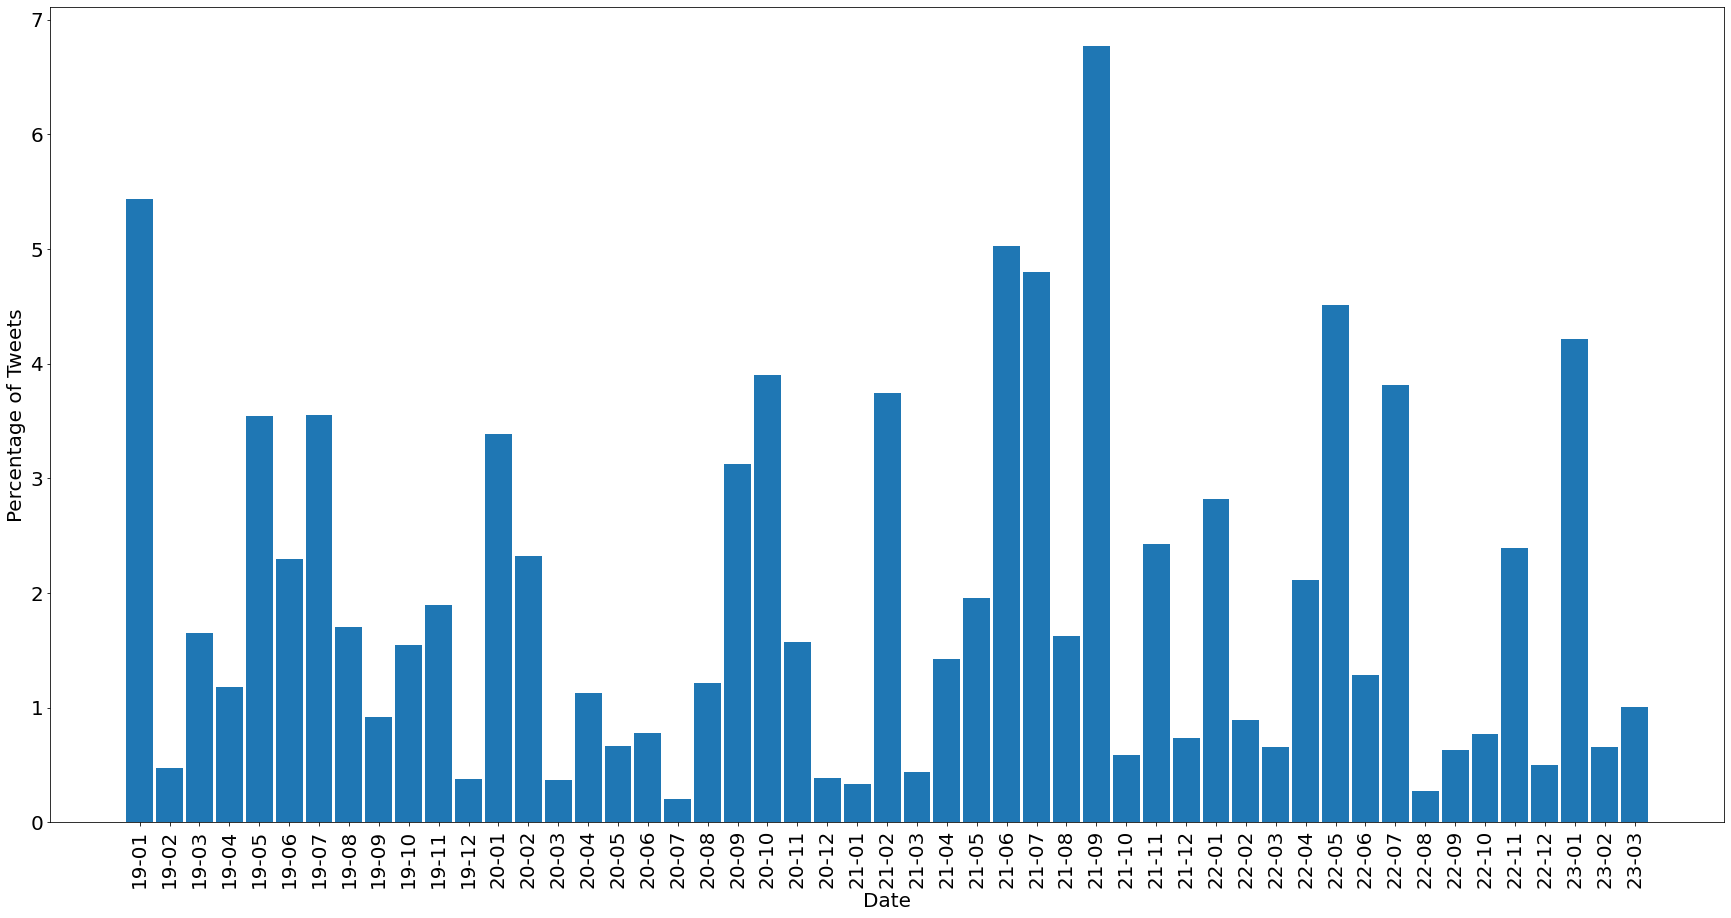

In [107]:
# Format the date to show only month and year
tweets_df['date'] = tweets_df['date'].dt.strftime('%y-%m')

# Count the number of tweets per date
tweets_by_date = tweets_df['date'].value_counts().sort_index()

# Convert counts to percentage
tweets_by_date_percent = (tweets_by_date / tweets_by_date.sum()) * 100

# Plot the results
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
ax.bar(tweets_by_date_percent.index, tweets_by_date_percent.values, width=0.9, align='center')
ax.set_xticklabels(tweets_by_date_percent.index, rotation=90)
ax.set_xlabel('Date')
ax.set_ylabel('Percentage of Tweets')
#plt.savefig('tweets_plot.svg', dpi=600)
plt.show()


In [133]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import contractions
import re
from nltk.corpus import stopwords
import string
stop_words = stopwords.words('english')
analyzer = SentimentIntensityAnalyzer()

# Define a function to clean the tweets for VADER sentiment analysis
import re

def clean_tweet_for_vader(tweet):
    tweet = contractions.fix(tweet)
    tweet = re.sub(r'No\.\s*\d+', '', tweet)
    tweet = re.sub(r'^b(?:"|\')?(.*)$', r'\1', tweet)
    tweet = re.sub(r"\\n", '', tweet)
    tweet = re.sub(r'http\S+', '', tweet)
    tweet = re.sub(r'@\s*\w+', '', tweet)
    tweet = re.sub(r'#\s*\w+', '', tweet)
    tweet = re.sub(r'\d+', '', tweet)
    tweet = re.sub(r'\\x\S+', '', tweet) # remove \x combinations
    tweet = re.sub(r'xfxfx\S+', '', tweet) # remove words starting with xfxfx
    tweet = tweet.strip()
    tweet = ' '.join([word for word in tweet.split() if word not in stop_words or word in ["no", "not","nor","but"]])
    translator = str.maketrans('', '', string.punctuation.replace('!', '').replace('?', ''))
    tweet = tweet.translate(translator)
    
    return tweet

# Clean the tweets for VADER sentiment analysis
tweets_df['clean_tweet'] = tweets_df['text'].apply(clean_tweet_for_vader)

# AFTER TWEETS ARE CLEANED: Remove duplicate tweets after cleaning and keep only the first occurrence
tweets_df = tweets_df.drop_duplicates(subset='clean_tweet', keep='first')

# Define a function to apply VADER 
def get_vader_scores(tweet):
    scores = analyzer.polarity_scores(tweet)
    pos_score = scores['pos']
    neu_score = scores['neu']
    neg_score = scores['neg']
    comp_score = scores['compound']
    if comp_score >= 0.05:
        sentiment = 'positive'
    elif comp_score <= -0.05:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'
    return pos_score, neu_score, neg_score, comp_score, sentiment

tweets_df['pos'], tweets_df['neu'], tweets_df['neg'], tweets_df['compound'], tweets_df['sentiment'] = zip(*tweets_df['clean_tweet'].apply(get_vader_scores))

# Output the results in a new dataframe
output_df = tweets_df[['username', 'text',"clean_tweet", 'date', 'location', 'pos', 'neu', 'neg', 'compound',"sentiment"]]

# Display the output dataframe
output_df.head(100)


,username,text,clean_tweet,date,location,pos,neu,neg,compound,sentiment
1138,Tennis,"b'""Mr. Emerson said he\'s pissed with me because I broke his record,\xe2\x80\x9d joked Djokovic.\n\nReporting from Melbourne, Joel Drucker on Novak Djokovic\'s seventh heaven at the Australian Open: https://t.co/1IMrVqBdlp https://t.co/EbRULgr9b7'",Mr Emerson said hes pissed I broke record joked DjokovicReporting Melbourne Joel Drucker Novak Djokovics seventh heaven Australian Open,19-01,Everywhere,0.211,0.526,0.263,-0.3400,negative
5832,ITFTennis,"b'Roger Federer, Rafa Nadal and Novak Djokovic are out on their own on the all-time list... https://t.co/lZpkEog7Rm'",Roger Federer Rafa Nadal Novak Djokovic alltime list,19-01,NaN,0.000,1.000,0.000,0.0000,neutral
5833,ITFTennis,b'Sound ON \xf0\x9f\x94\x8a Incredible scenes at Melbourne Park after Novak Djokovic won his SEVENTH #AusOpen title...\n\n\xf0\x9f\x8e\xa5 @DjokerNole\n https://t.co/p6TwzGagwu',Sound ON Incredible scenes Melbourne Park Novak Djokovic SEVENTH title,19-01,NaN,0.000,1.000,0.000,0.0000,neutral
5834,ITFTennis,"b'After winning Wimbledon, the US Open and the #AusOpen back to back, Novak Djokovic can become the 2nd man in history to twice hold all 4 Grand Slam titles at the same time (after Rod Laver)\n\nBacking @DjokerNole to win at Roland Garros? https://t.co/gE3JPTDOal'",After winning Wimbledon US Open back back Novak Djokovic become nd man history twice hold Grand Slam titles time after Rod LaverBacking win Roland Garros?,19-01,NaN,0.302,0.621,0.077,0.8225,positive
5835,ITFTennis,"b""The boy from Belgrade that grew into a 15-time Grand Slam champion \xf0\x9f\x87\xb7\xf0\x9f\x87\xb8\n\n@DjokerNole's journey tells us that young dreams really can come true.\n\n\xf0\x9f\x93\xb8 Novak Djokovic/ Instagram https://t.co/Uq9tnWamP9""",The boy Belgrade grew time Grand Slam champion journey tells us young dreams really come true Novak Djokovic Instagram,19-01,NaN,0.433,0.478,0.089,0.8773,positive
...,...,...,...,...,...,...,...,...,...,...
5662,usopen,"b'Shapo Strikes Back!\n\nFrom 1-4 down, Shapovalov will now serve for the 3rd set at 5-4 against Djokovic in their R3 #AusOpen encounter...\n\n\xf0\x9f\x93\xb8: #USOpen https://t.co/v7J2BzTtAF'",Shapo Strikes Back!From down Shapovalov serve rd set Djokovic R encounter,19-01,"Flushing Meadows, New York",0.000,0.763,0.237,-0.4199,negative
5663,usopen,b'Back on serve!\n\nShapovalov breaks Djokovic and serves at 3-4 in the 3rd set...\n\n#AusOpen\n\n\xf0\x9f\x93\xb8: #USOpen https://t.co/WTwf3ipD1U',Back serve!Shapovalov breaks Djokovic serves rd set,19-01,"Flushing Meadows, New York",0.000,1.000,0.000,0.0000,neutral
5664,usopen,"b'In complete control:\n\nDjokovic now leads Shapovalov 6-3, 6-4, 3-1 in their R3 match on Rod Laver Arena... #AusOpen\n\n\xf0\x9f\x93\xb8: #USOpen https://t.co/fUmfiiQ6x6'",In complete controlDjokovic leads Shapovalov R match Rod Laver Arena,19-01,"Flushing Meadows, New York",0.000,1.000,0.000,0.0000,neutral
5665,usopen,b'No problems so far for the \xf0\x9f\x8c\x8e#\xef\xb8\x8f\xe2\x83\xa31\xef\xb8\x8f\xe2\x83\xa3:\n\nDjokovic takes the first set 6-3 against Shapovalov in their R3 #AusOpen affair on Rod Laver Arena...\n\n\xf0\x9f\x93\xb8: #USOpen https://t.co/nUJ2xkh6V0',No problems far takes first set Shapovalov R affair Rod Laver Arena,19-01,"Flushing Meadows, New York",0.000,0.647,0.353,-0.5994,negative


In [167]:
output_df.tail(10)

,username,text,clean_tweet,date,location,pos,neu,neg,compound,sentiment
11533,TennisTV,b'Djokovic: 15-0 unbeaten to start 2023 \xf0\x9f\xa4\x96\n\nMedvedev: 12-0 run - winning two consecutive titles \xf0\x9f\xa4\x96\n\nTomorrow in Dubai could be \xf0\x9f\xa5\xb5\xf0\x9f\x94\xa5\n\n#DDFTennis',Djokovic unbeaten start run winning two consecutive titles Dubai could,23-03,Live stream the ATP Tour,0.274,0.726,0.000,0.5267,positive
11532,TennisTV,b'The walk to court\xe2\x80\xa6\n\nDjokovic and Medvedev head to battle in Dubai \xf0\x9f\xa4\xa9\n\n#DDFTennis https://t.co/0sCZrHnwNq',The walk court Medvedev head battle Dubai,23-03,Live stream the ATP Tour,0.000,0.698,0.302,-0.3818,negative
11531,TennisTV,b'Daniil strikes first! \xf0\x9f\x94\xa5\n\n@DaniilMedwed takes the opening set against Djokovic 6-4 in Dubai!\n\n#DDFTennnis https://t.co/PC62oFbvzm',Daniil strikes first! takes opening set Djokovic Dubai!,23-03,Live stream the ATP Tour,0.000,0.694,0.306,-0.4738,negative
11216,TennisChannel,b'It is time for the big showdown! Djokovic vs Medvedev for a spot in the Dubai final!\n\nStream live \xe2\x80\x94&gt; https://t.co/tPoe44Ubky\n\n#DDFTennis https://t.co/2LbTGLneOC',It time big showdown! Djokovic vs Medvedev spot Dubai final!Stream live,23-03,USA,0.000,1.000,0.000,0.0000,neutral
11217,TennisChannel,"b'.@AndreyRublev97 defeats Zverev for the first time in six meetings on tour, beating the German 6-3 7-6(9) in Dubai!\n\nThe defending champ awaits the winner of Djokovic and Medvedev in the final. #DDFTennis https://t.co/fSmRbxtwuG'",defeats Zverev first time six meetings tour beating German Dubai!The defending champ awaits winner Djokovic Medvedev final,23-03,USA,0.329,0.465,0.205,0.4926,positive
3897,TennisChannel,b'a battle for the quarterfinals \xf0\x9f\x92\xa5\n\nDjokovic vs. Griekspoor \n\nStream live \xe2\x80\x94&gt; https://t.co/tPoe44TDv0\n\n#DDFTennis https://t.co/ZwpIwMvppy',battle quarterfinals vs Griekspoor Stream live,23-03,USA,0.000,0.658,0.342,-0.3818,negative
3896,TennisChannel,b'fighting for a spot in the semifinals \xf0\x9f\x91\x8a\n\nDjokovic takes on Hurkacz \xf0\x9f\x92\xa5\n\nStream live \xe2\x80\x94&gt; https://t.co/tPoe44TDv0\n\n#DDFTennis https://t.co/WY0vMrIW67',fighting spot semifinals takes Hurkacz live,23-03,USA,0.000,0.667,0.333,-0.3612,negative
3895,TennisChannel,b'20 straight points for @DaniilMedwed to close out the 6-3 6-2 win over Coric in Dubai!\n\nThe World No. 7 faces Djokovic next for the 14th time as they battle for a spot in the final. #DDFTennis https://t.co/LiMaMSLACR',straight points close win Coric Dubai!The World faces Djokovic next th time battle spot final,23-03,USA,0.291,0.583,0.126,0.5255,positive
3894,TennisChannel,b'Semifinal H2H in Dubai:\n\nDjokovic 9-4 over Medvedev (ND won last 4 meetings)\n\nZverev 5-0 over Rublev (won all 11 sets) https://t.co/oJpvK57N6B',Semifinal HH DubaiDjokovic Medvedev ND last meetingsZverev Rublev won sets,23-03,USA,0.291,0.709,0.000,0.5719,positive
3891,TennisChannel,"b""Second time's the charm!\n\n@DaniilMedwed serves out the set to take a 6-4 lead over Djokovic! #DDFTennis https://t.co/McNzLWEUD2""",Second times charm! serves set take lead Djokovic!,23-03,USA,0.319,0.681,0.000,0.5080,positive


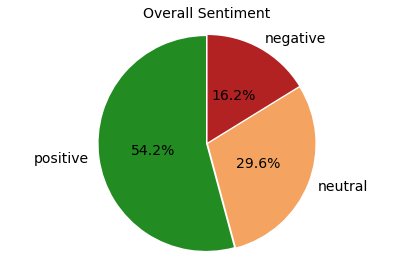

In [195]:
# Define the colors for each sentiment
colors = ['#228B22','#F4A460', '#B22222']

# Count the number of tweets for each sentiment
sentiment_counts = output_df['sentiment'].value_counts()
myexplode = [0.01, 0.01, 0.01]
# Plot the results as a pie chart with custom colors
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=colors,startangle = 90,textprops={'fontsize':14},explode=myexplode,
       pctdistance=0.5, 
        labeldistance=1.1) 
plt.axis('equal')
plt.title('Overall Sentiment',fontdict={'fontsize': 14, 'fontfamily': 'helvetica'})
plt.tight_layout()
#plt.savefig("overallSentiment.png", dpi=500, facecolor='w')
plt.show()

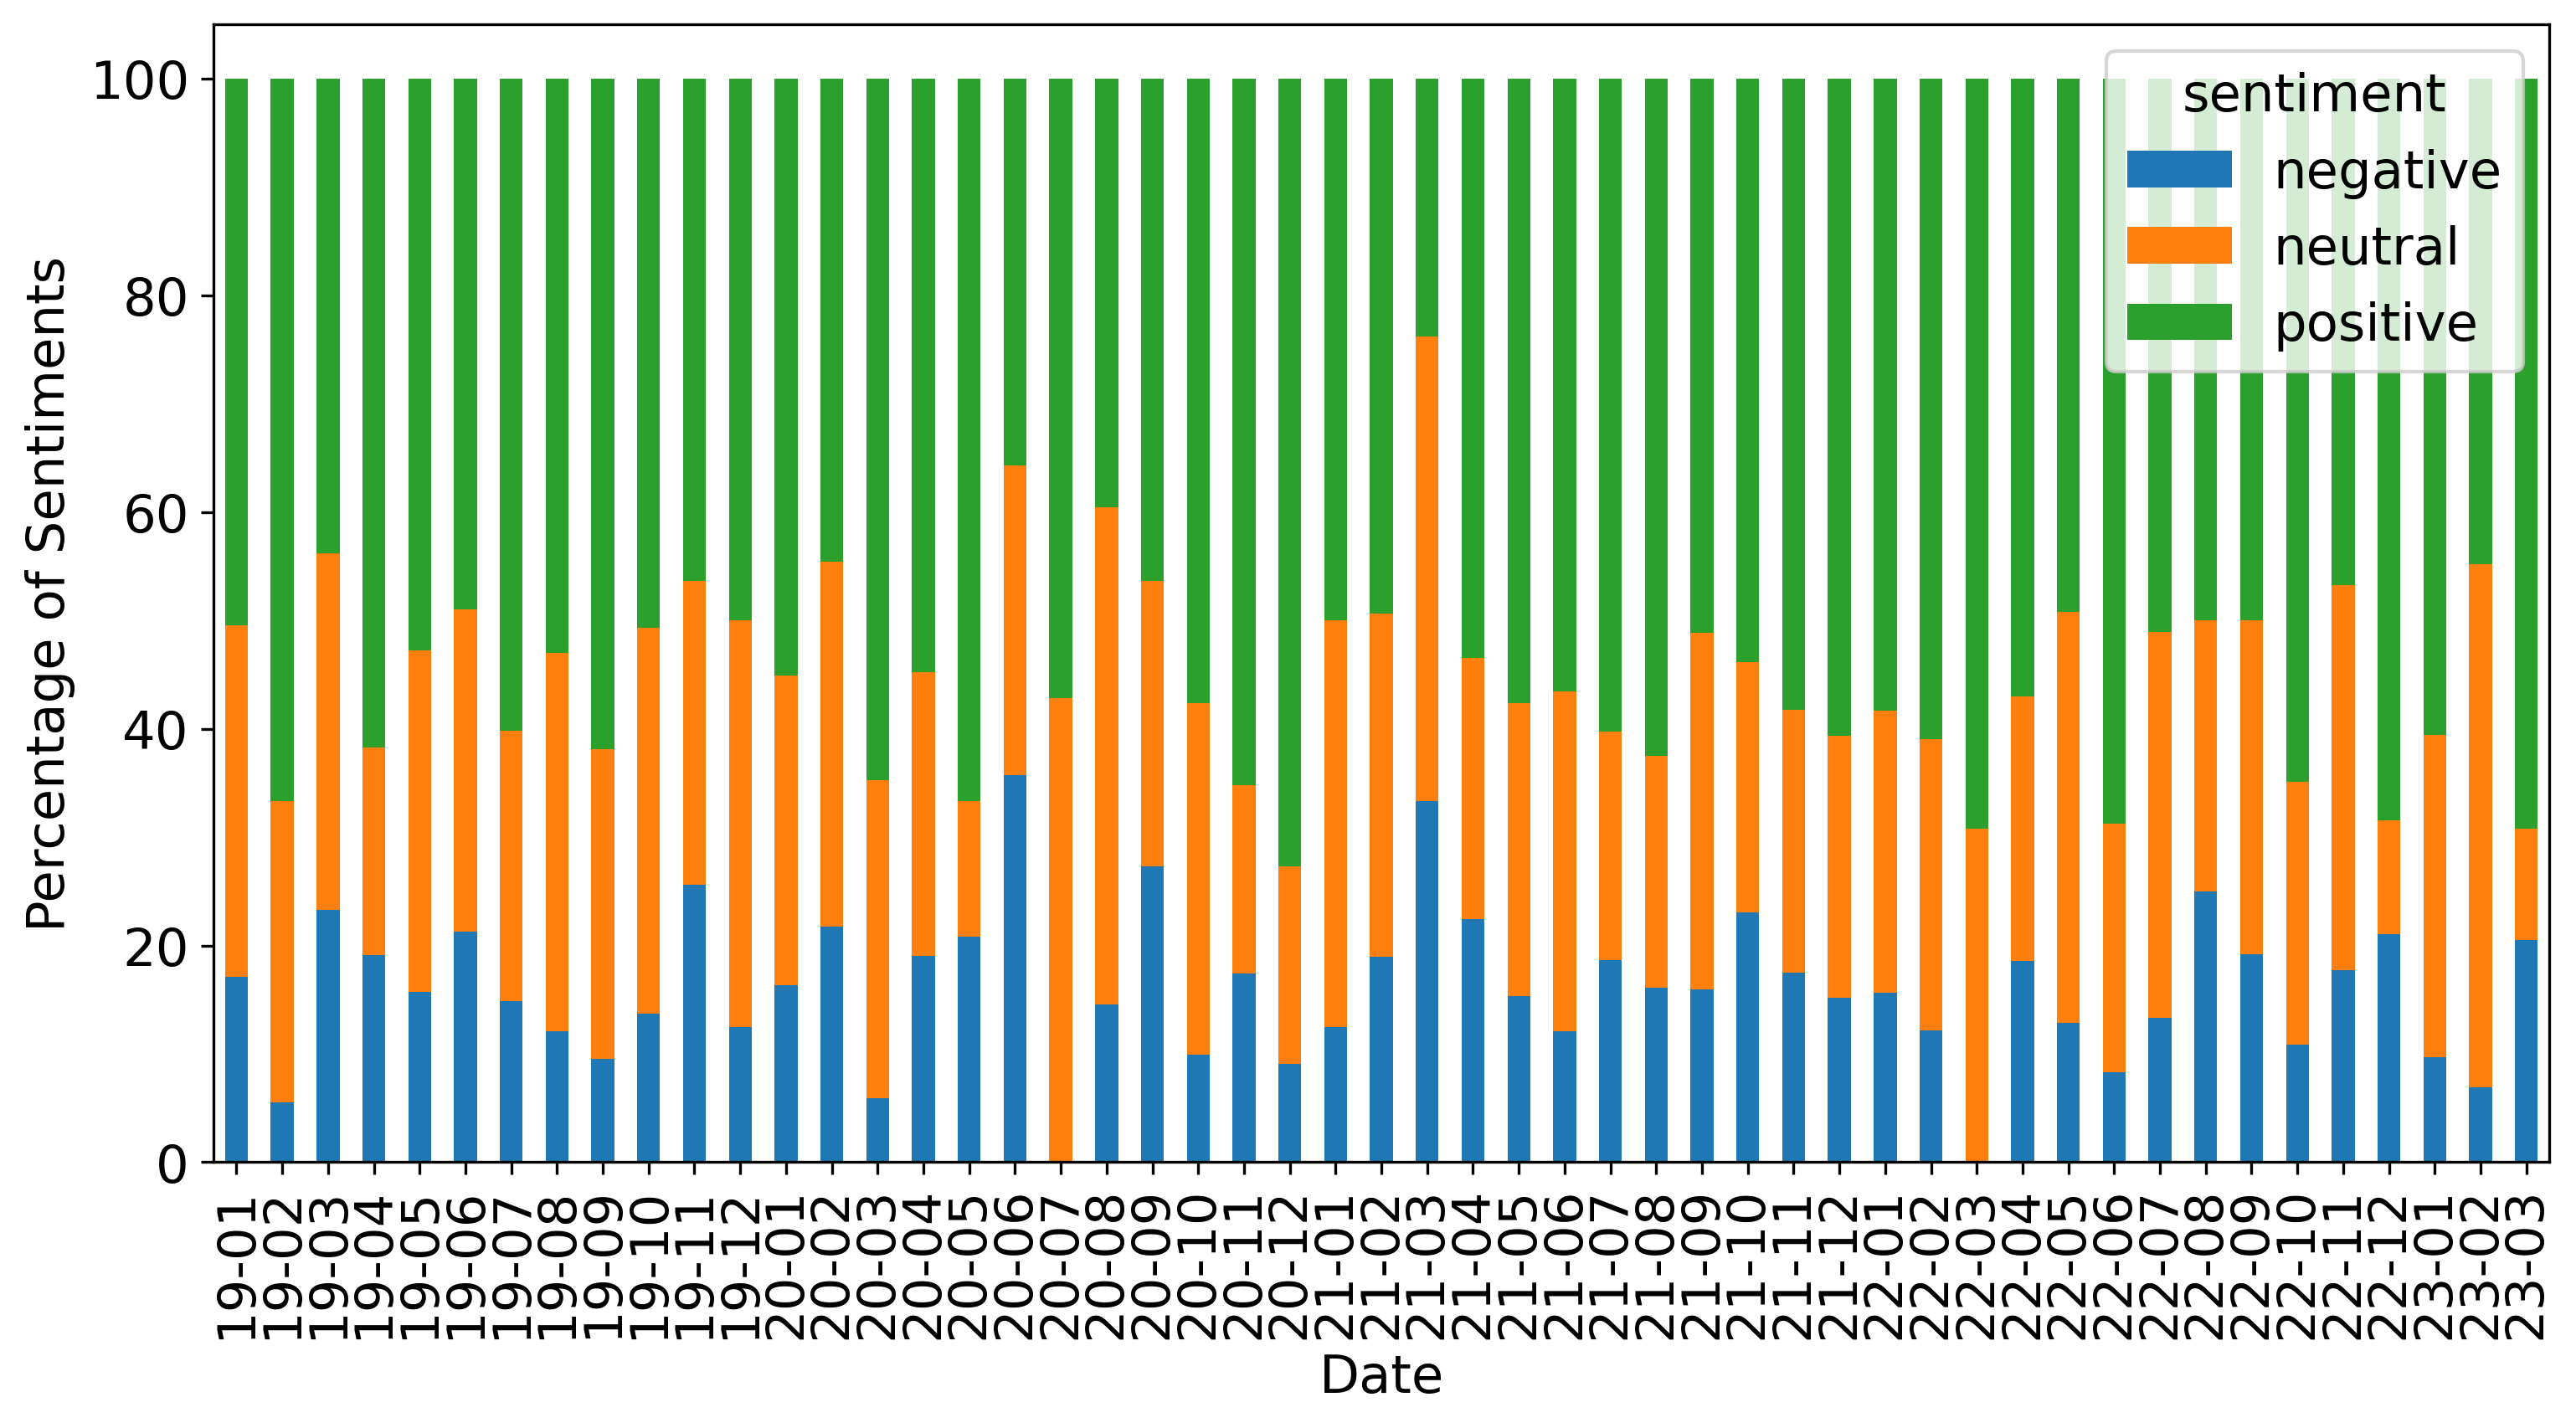

In [198]:
# Count the number of sentiments per month
sentiments_per_month = output_df.groupby(['date', 'sentiment']).size().reset_index(name='counts')

# Pivot the data to create a separate column for each sentiment
sentiments_per_month = sentiments_per_month.pivot(index='date', columns='sentiment', values='counts').fillna(0)

# Calculate the total number of sentiments per month
sentiments_per_month['total'] = sentiments_per_month.sum(axis=1)

# Convert the sentiment counts to percentages
for col in sentiments_per_month.columns:
    if col != 'total':
        sentiments_per_month[col] = (sentiments_per_month[col] / sentiments_per_month['total']) * 100

# Plot the results
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(12, 6), dpi=300)
sentiments_per_month.drop('total', axis=1).plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Percentage of Sentiments')
#plt.savefig("percentage.png", dpi=500,facecolor='w')
plt.show()


In [128]:
pd.set_option('display.max_colwidth', None) 

In [153]:
output_df[(output_df['date'] >= "21-03") & (output_df['date'] < "21-04")&(output_df['sentiment'] =="negative")]

,username,text,clean_tweet,date,location,pos,neu,neg,compound,sentiment
8075,Tennis,"b'""He\xe2\x80\x99s an emotional guy, but somehow it never corrupts his stroke work, or finds expression as a poor decision, a hasty decision or a puzzling decision\xe2\x80\x94a problem faced by many other players.""\n\nIn 2007, @ptbodo saw something very special in Novak Djokovic.\n\nhttps://t.co/oXwQlgS7hJ'",He emotional guy but somehow never corrupts stroke work finds expression poor decision hasty decision puzzling decision problem faced many playersIn saw something special Novak Djokovic,21-03,Everywhere,0.140,0.637,0.223,-0.5927,negative
11889,TennisTV,"b""The sporting world was a VERY different place the last time Djokovic, Nadal, Federer or Murray didn't occupy the top 2 spots in the @atptour rankings \xf0\x9f\x91\x80 https://t.co/jZBuWNqTvx""",The sporting world VERY different place last time Djokovic Nadal Federer Murray not occupy top spots rankings,21-03,Live stream the ATP Tour,0.000,0.910,0.090,-0.1511,negative
11888,TennisTV,b'List of players that have beaten @AsKaratsev in 2021:\n\nNovak Djokovic\nDominic Thiem\n\nEnd of list. https://t.co/bTC40sKB1n',List players beaten Novak DjokovicDominic ThiemEnd list,21-03,Live stream the ATP Tour,0.000,0.682,0.318,-0.4215,negative
3237,Tennis,"b""Catch Big Foe on this week's #TCLive podcast. \xf0\x9f\x99\x8c\n\n@FTiafoe joins to talk his marathon first round victory at the #ChileDoveMenCareOpen, his experience in Australia &amp; giving Djokovic all he could handle, the origins of his nickname, and more.\n\nListen now!\nhttps://t.co/sao1tSwsrH""",Catch Big Foe weeks podcast joins talk marathon first round victory experience Australia amp giving Djokovic could handle origins nickname moreListen now!,21-03,Everywhere,0.094,0.781,0.125,-0.2003,negative
8621,TennisChannel,"b'Today in Dubai:\n@AsKaratsev cruises into round 2.\n@tsonga7 experiences pain on court.\n@jimchardy takes down Ramos-Vinolas in 3. \n@AlexeiPopyrin99 defeats Denis Novak.\n\n@Steve_Weissman, @paul_annacone &amp; @jon_wertheim break down the highlights on #TCLive\xe2\x86\x92https://t.co/tPoe44TDv0 https://t.co/C2VFegQUCQ'",Today Dubai cruises round experiences pain court takes RamosVinolas defeats Denis Novak amp break highlights,21-03,USA,0.000,0.699,0.301,-0.6808,negative
4084,TennisChannel,"b'Despite the controversy and changes around the\n#MiamiOpen this year, one thing hasn\xe2\x80\x99t changed: Miami always signals that the season is about to get serious. \n \nClay, Roland Garros, grass, Wimbledon; Nadal, Djokovic, Federer, Serena: All coming soon.\n\nhttps://t.co/yk9EMBfhmY'",Despite controversy changes around year one thing changed Miami always signals season get serious Clay Roland Garros grass Wimbledon Nadal Djokovic Federer Serena All coming soon,21-03,USA,0.000,0.951,0.049,-0.0772,negative
8822,TennisTV,"b'Gast-on fire \xf0\x9f\x94\xa5\n\nAfter breaking through at Roland Garros 2020, @HugoGaston7 gets his first win at an ATP Tour event, defeating Novak 3-6 6-4 6-1 in Marseille! \n\n@Open13 https://t.co/XkJmgvQj5r'",Gaston fire breaking Roland Garros gets first win ATP Tour event defeating Novak Marseille!,21-03,Live stream the ATP Tour,0.189,0.547,0.263,-0.1260,negative
